## Avocado Harvesters - Predicting Future Sales
 

In [1]:
# pip install seaborn  # not sure why needed to reinstall, but went w/o incident

In [2]:
# Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Import dataset from kaggle Source location (downloaded from): "https://www.kaggle.com/datasets/neuromusic/avocado-prices/data"
avo_data = pd.read_csv("./Resources/avocado.csv")

avo_data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Review dataset
# avo_data.info()  

# Drop 'type' column (as we want to look at all avocados and not differentiate between organic or conventional)
avo_data_df = avo_data.drop("type", axis=1)

sorted_df = avo_data_df[(avo_data_df["region"] == 'ALbany') & (avo_data_df["Date"] == "2015-12-27")]
sorted_df = avo_data_df.sort_values(by=["region", "Date"])
sorted_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,2015,Albany
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,Albany
9176,50,2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,2015,Albany
49,49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,Albany


In [5]:
avo_data_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [6]:
# Drop the Unnamed column, Set the Date column as the index 
# Drop 'Unnamed: 0' Index column
avo_data_df = avo_data_df.drop("Unnamed: 0", axis=1)

avo_data_df = avo_data_df.set_index("Date")
avo_data_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [7]:
# Identify unique regions (Total US, vs. Regions, vs. cities)
print(sorted(avo_data_df['region'].unique()))

['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']


### Notes on Data Clean up at this point 
List of Cities in DF:
'Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',  'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'WestTexNewMexico', 'NorthernNewEngland'

### and create a "Total US" dataframe if needed for future use
'TotalUS',
 
### and create a Regions dataframe if needed for future use:
'California', 'GreatLakes', 'West', 'Midsouth', 'Northeast', 'Plains', 'SouthCentral', 'Southeast'

In [8]:
# Marketing Data from DMA (DEsignated Marketing Areas)
# Maybe Missing Data - Create Counts (Are we safe to assume Regions = Cumulative City counts)
# Calc the math


In [19]:

# Seperate the data (remove rows with regions and 'Total US') in Region column (only keep cities)
# Create a Regions DF, and a TotalUS dataframe:
regions = ['California', 'GreatLakes', 'Midsouth', 'Northeast', 'Plains', 'SouthCentral', 'Southeast', 'West']

# Create a DF for TotalUS:
totalus_df =  avo_data_df[avo_data_df['region'] == 'TotalUS'].copy()

# Create a DF for Regions:
regions_df = avo_data_df[avo_data_df['region'].isin(regions)].copy()

avo_cities_df = avo_data_df[~avo_data_df['region'].isin(['TotalUS'] + regions)].copy()

# Verify and save
# totalus_df.head()
# avo_cities_df.tail(20)
# regions_dfhead(5)

# Create path to Resources Directory and Save df files
resources_path = "Resources/"
totalus_df.to_csv(resources_path + "Total_US.csv", index=False)
regions_df.to_csv(resources_path + "Total_avo_Regions.csv", index=False)
avo_cities_df.to_csv(resources_path + "Total_avo_Cities.csv", index=False)

avo_cities_df.tail(2)



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Date,,,,,,,,,,,
2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico
2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,WestTexNewMexico


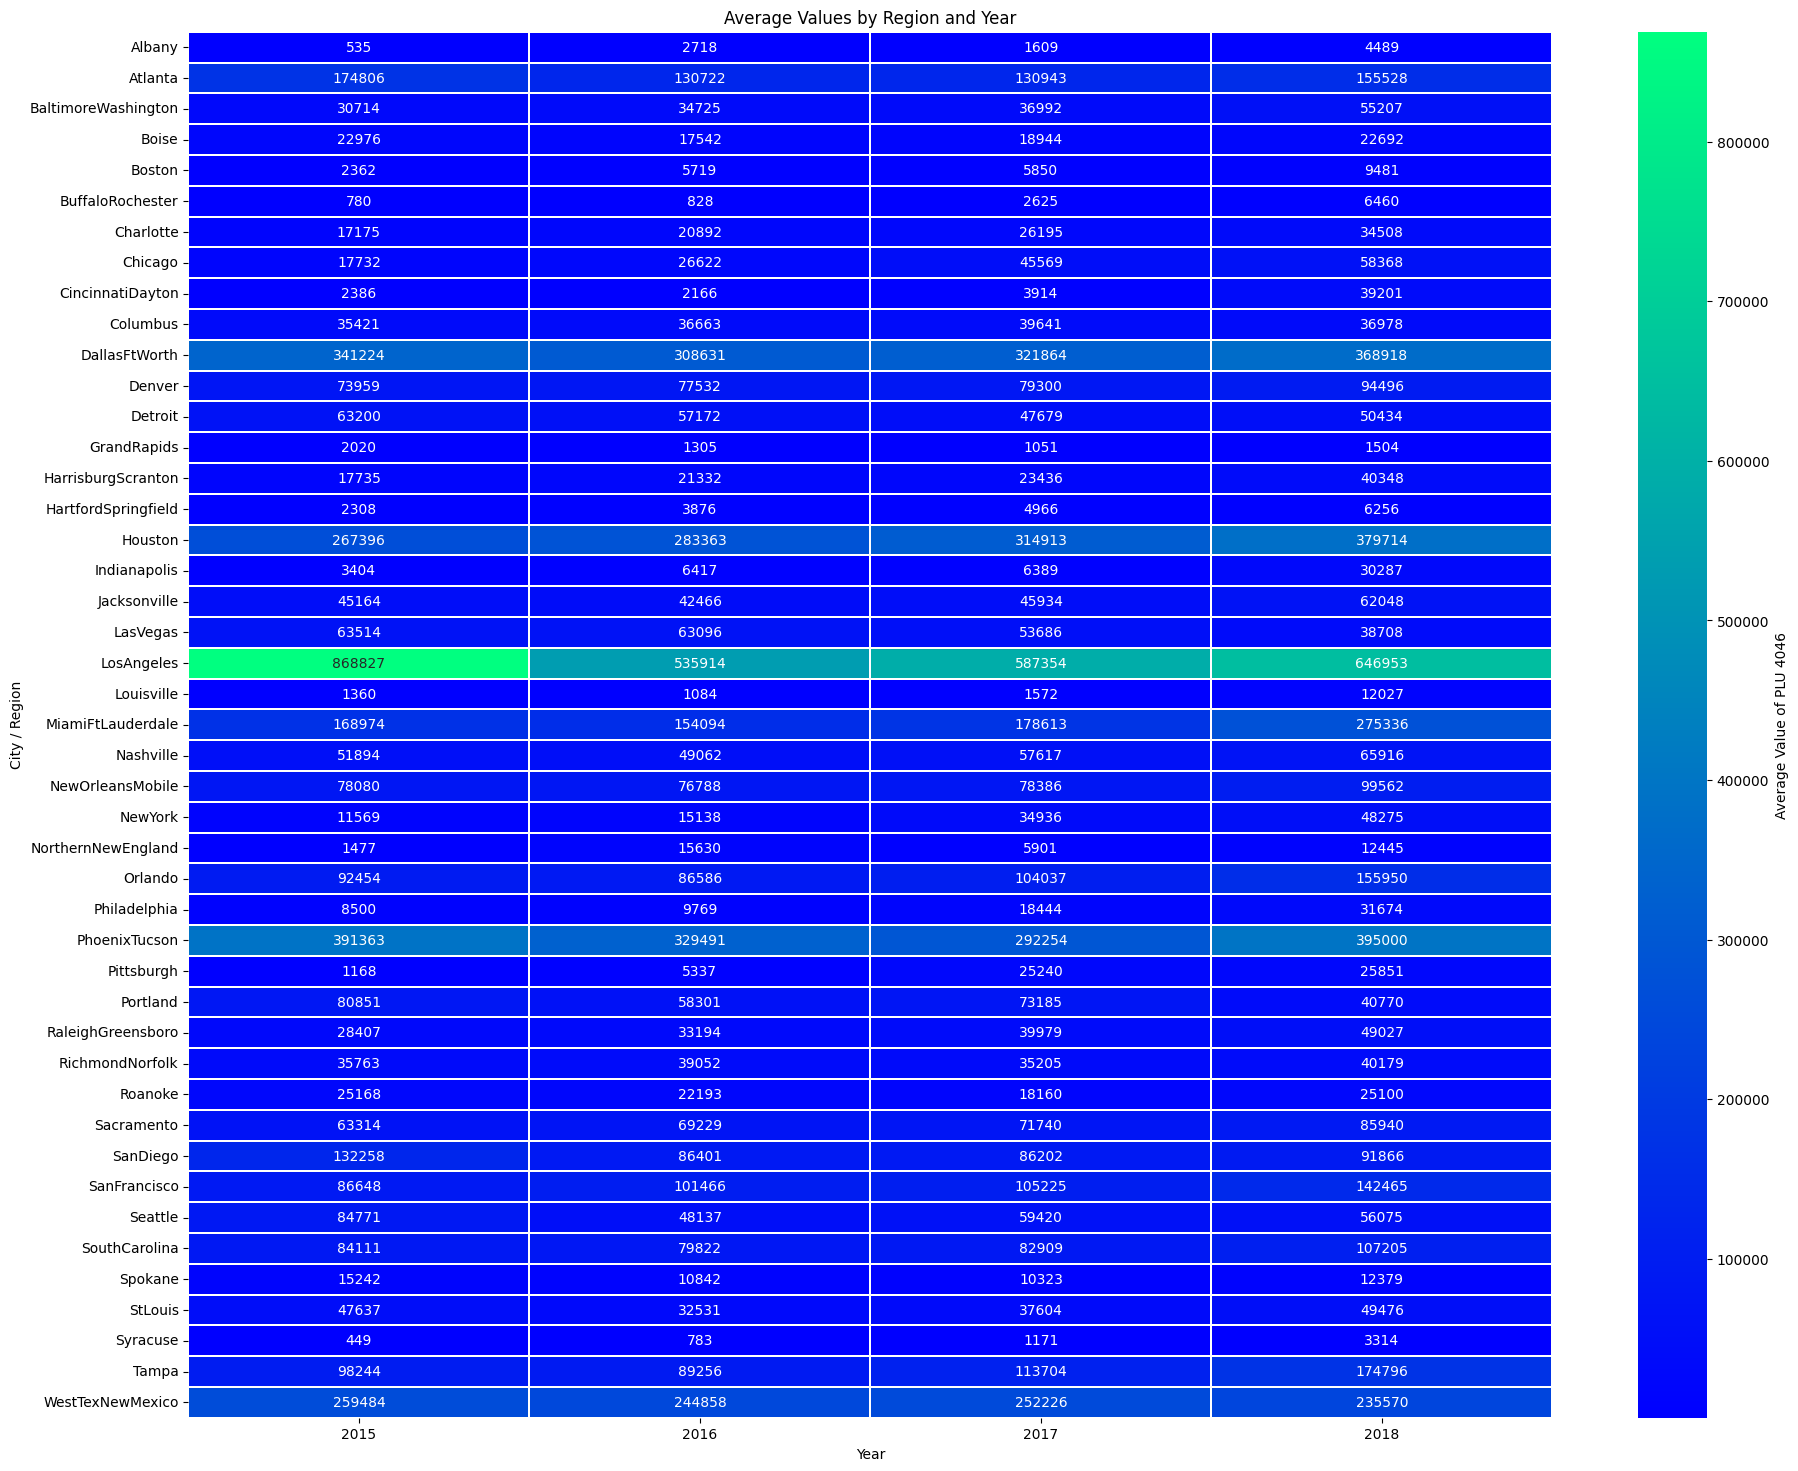

In [ ]:
# Investigate the Zero values 
df = avo_cities_df.copy()

#  --------- REVISE for Totals in Each City and each year  ------------
pivot_data = pd.pivot_table(
    df,
    values='4046',
    # values='4225',
    # values='4770',
    index='region',
    columns='year',
    aggfunc='mean'   # "median", 'std' 'mean'
    )    
plt.figure(figsize=(22, 18))
sns.heatmap(
    pivot_data, 
    cmap='winter', 
    annot=True,
    fmt='.0f',
    linewidths=.005,
    cbar_kws={'label': 'Average Value of PLU 4046'}   # 4046 & 4225 & 4770
)
plt.title('Average Values by Region and Year')
plt.xlabel('Year')
plt.ylabel('City / Region')
plt.show()


In [20]:
# Need to be able to see months and seasonality
#  Break out to months and months & years & Seasons
df.index = pd.to_datetime(df.index)
df['Month'] = df.index.month
df['MonthYear'] = df.index.strftime('%B')
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
           5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['Season'] = df.index.month.map(seasons)
df.head(5)



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,MonthYear,Season
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,2015,Albany,12,December,Winter
2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,2015,Albany,12,December,Winter
2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,2015,Albany,12,December,Winter
2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,2015,Albany,12,December,Winter
2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,2015,Albany,11,November,Fall


In [ ]:
# Check Counts of Zeros / Nulls  possibly use Imputation & Zero values in dataset (likely valuable data and we do NOT want to drop.na's)
# for Colums and get a % of total 
# df.head() 
# df.count()
# df.describe
# df.info()

# Replace "0.0" Float values in the following columns:
# columns_to_replace = ['4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
# df[columns_to_replace] = df[columns_to_replace].replace(0.0, pd.NA)

# df.isnull().sum()
df.head() 



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,MonthYear,Season
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,December,Winter
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,December,Winter
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,December,Winter
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,December,Winter
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,November,Fall


In [13]:
# Impute Data by Region (by the mean for that region) & appy to columns: 4046, 4225, 4770, Small Bags, Large Bags, XLarge Bags
# Start with a fresh copy of the prepped avo DF
df_imputed = df.copy()

# Create a function to Impute by region
def impute_by_region(df, columns_to_impute):

    # Process, Compute mean for each region by column:
    for column in columns_to_impute:
        region_means = df[df[column] > 0 ].groupby('region')[column].mean()
        region_means = region_means.round(2)

        # Loop through regions and skip if no mean for 
        for region in df['region'].unique():
            if region not in region_means:
                continue

            # Save the means
            mean_value = region_means[region]
            
            mask = (df_imputed['region'] == region) & (df_imputed[column] ==0)
                # If no vaild data here, use the overall mean
            df_imputed.loc[mask, column] = mean_value
    return df_imputed




In [14]:
# df.info()
# Convert Float columns to Integers
columns_to_convert = ["Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]	

df[columns_to_convert] = df[columns_to_convert].astype(int)

In [15]:
# columns_to_impute:
columns_to_impute = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Apply imputation
df_imputed = impute_by_region(df, columns_to_impute)

print(f"Sample of *BEFORE* for column 4046 (count with zeros): {(df['4046'] == 0).sum()}")
print(f"Sample of *AFTER* for column 4046 (count with zeros): {(df_imputed['4046'] == 0).sum()}")

Sample of *BEFORE* for column 4046 (count with zeros): 242
Sample of *AFTER* for column 4046 (count with zeros): 0


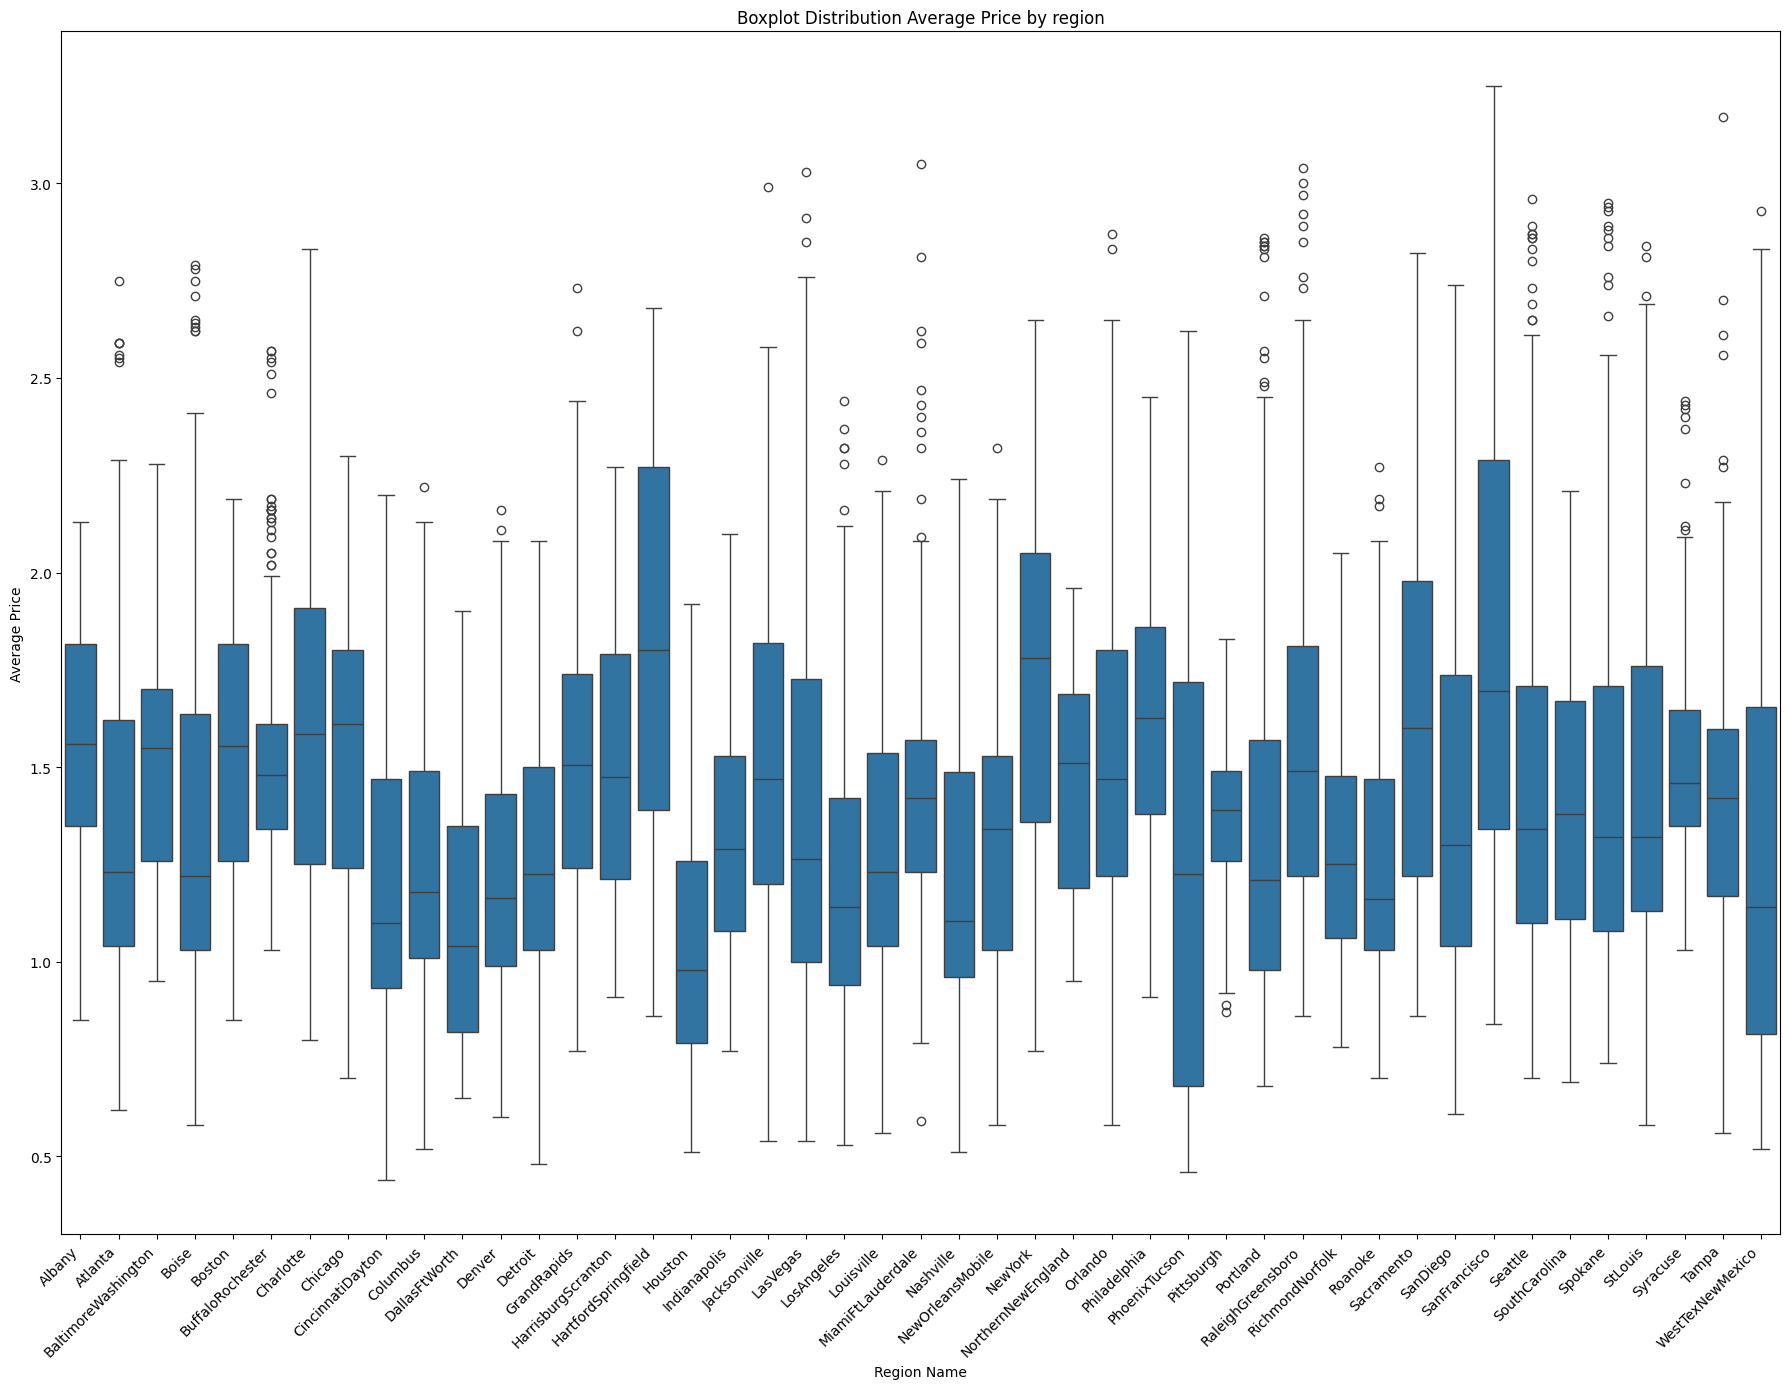

In [16]:
# Look at the data with a BOX Plot
plt.figure(figsize=(18, 14))
ax = sns.boxplot(x='region', y='AveragePrice', data=df_imputed)
ax.set_xlabel("Region Name")
ax.set_ylabel("Average Price")
plt.title('Boxplot Distribution Average Price by region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


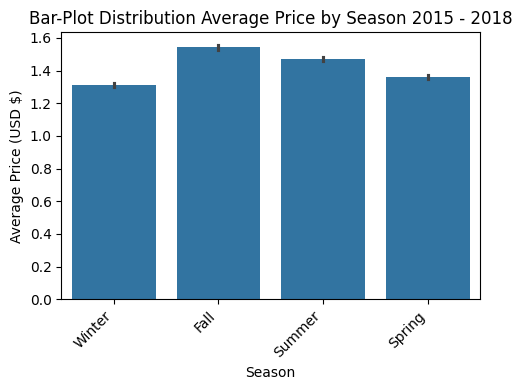

In [17]:
# Look at Price by Season w/ a Bar-Plot

plt.figure(figsize=(5, 4))
ax = sns.barplot(x='Season', y='AveragePrice', data=df_imputed)
ax.set_xlabel("Season")
ax.set_ylabel("Average Price (USD $)")
plt.title('Bar-Plot Distribution Average Price by Season 2015 - 2018')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

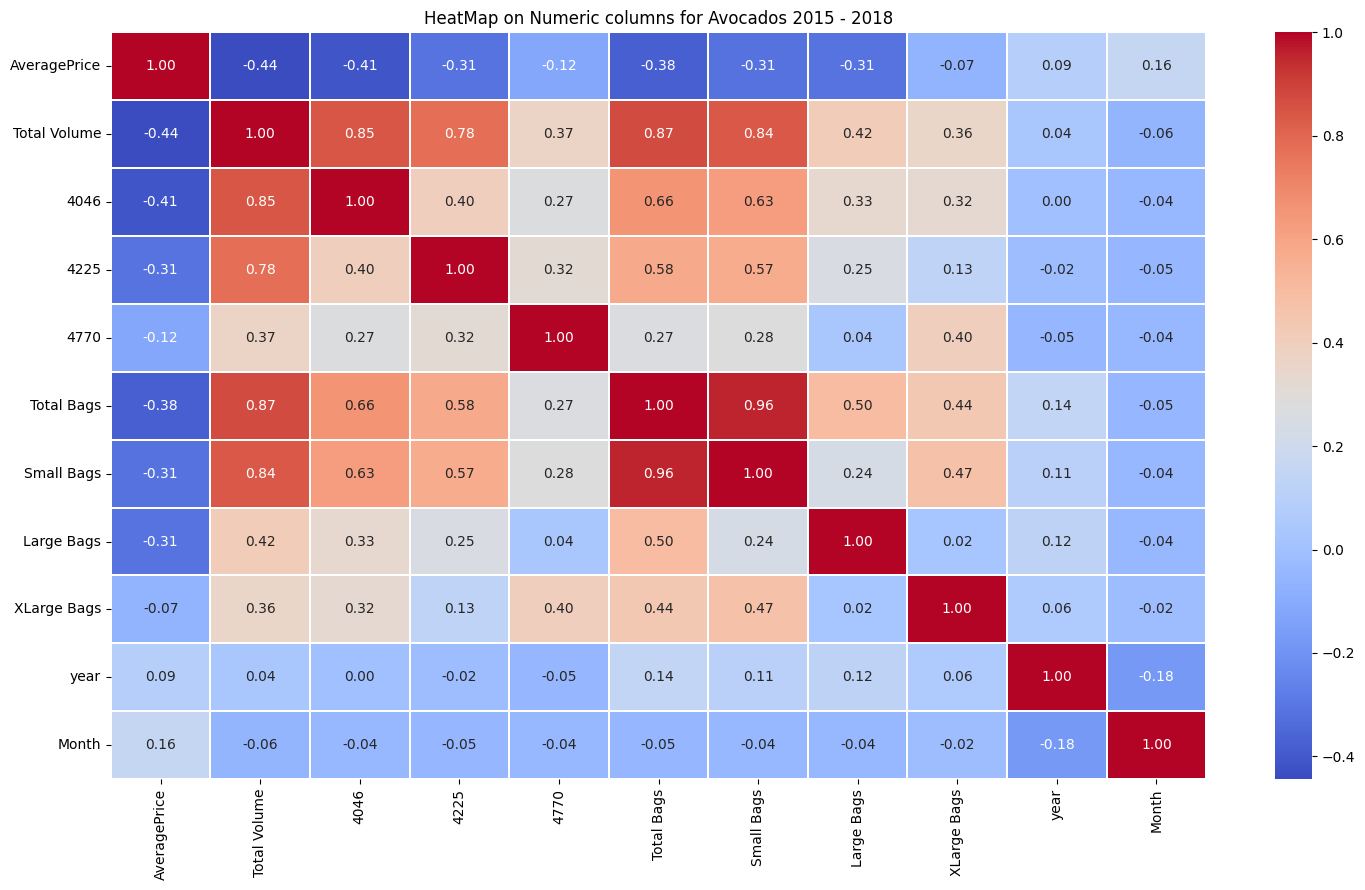

In [18]:
# HeatMap on Numeric columns  
#  Does this add value - What is it telling me ?

numeric_columns = df_imputed.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 9))
correlation = df_imputed[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.25)
plt.title('HeatMap on Numeric columns for Avocados 2015 - 2018')
plt.tight_layout()
plt.show()
